# Welcome to your first steps in becoming an AI practicioner

Let us check if required state-of-the-art AI libraries work for you.

### Data loading, viewing and manipulation

In python (notebooks) we typically start with importing all required packages, let us start with packages to load, view and manipulate data

In [10]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [11]:
# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv

--2023-11-21 09:57:17--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375 (3.3K) [text/plain]
Saving to: ‘kwb-2018-toelichting.csv.1’

kwb-2018-toelichtin 100%[===================>]   3.30K  --.-KB/s    in 0s      

2023-11-21 09:57:17 (34.0 MB/s) - ‘kwb-2018-toelichting.csv.1’ saved [3375/3375]

--2023-11-21 09:57:17--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774153 (3.6M) [text/plain]
Saving to: ‘kwb-2018.csv.1’

kwb-2018.csv.1      100%[===================>]   3.60M  --.-KB/s    in 0.04s   

202

In [12]:
import os
data_directory = os.path.join('/content')

The "running example data" in this course are CBS' geographical stats per district, municipality and square in the Netherlands. Let us see in the meta data what is in this data.

In [13]:
import csv

column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv"), encoding='latin1') as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]

The above is a dictionairy with keys and values, the keys contain the "abbreviation" used in the real dataset. The values include the description of this abbreviation

In [14]:
column_reference_table.keys()

dict_keys(['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_geb', 'p_geb', 'a_ste', 'p_ste', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'g_ele', 'g_ele_ap', 'g_ele_tw', 'g_ele_hw', 'g_ele_2w', 'g_ele_vw', 'g_ele_hu', 'g_ele_ko', 'g_gas', 'g_gas_ap', 'g_gas_tw', 'g_gas_hw', 'g_gas_2w', 'g_gas_vw', 'g_gas_hu', 'g_gas_ko', 'p_stadsv', 'a_inkont', 'g_ink_po', 'g_ink_pi', 'p_ink_li', 'p_ink_hi', 'p_n_act', 'p_hh_li', 'p_hh_hi', 'p_hh_lkk', 'p_hh_osm', 'a_soz_wb', 'a_soz_ao', 'a_soz_ww', 'a_soz_ow', 'g_wodief', 'g_vernoo', 'g_gewsek', 'a_bedv', 'a_bed_a', 'a_bed_bf', 'a_bed_gi', 'a_bed_hj', 

In [15]:
column_reference_table.values()

dict_values(['gwb code 10', 'gwb code 8', 'Regioaanduiding', 'Gemeentenaam', 'Soort regio', 'Codering', 'Indelingswijziging wijken en buurten', 'Aantal inwoners', 'Mannen', 'Vrouwen', '0 tot 15 jaar', '15 tot 25 jaar', '25 tot 45 jaar', '45 tot 65 jaar', '65 jaar of ouder', 'Ongehuwd', 'Gehuwd', 'Gescheiden', 'Verweduwd', 'Westers totaal', 'Niet-westers totaal', 'Marokko', 'Nederlandse Antillen en Aruba', 'Suriname', 'Turkije', 'Overig niet-westers', 'Geboorte totaal', 'Geboorte relatief', 'Sterfte totaal', 'Sterfte relatief', 'Huishoudens totaal', 'Eenpersoonshuishoudens', 'Huishoudens zonder kinderen', 'Huishoudens met kinderen', 'Gemiddelde huishoudensgrootte', 'Bevolkingsdichtheid', 'Woningvoorraad', 'Gemiddelde woningwaarde', 'Percentage eengezinswoning', 'Percentage meergezinswoning', 'Percentage bewoond', 'Percentage onbewoond', 'Koopwoningen', 'Huurwoningen totaal', 'In bezit woningcorporatie', 'In bezit overige verhuurders', 'Eigendom onbekend', 'Bouwjaar voor 2000', 'Bouwjaar

We can query these description as follows:

In [16]:
print(column_reference_table['a_inw'])
print(column_reference_table['recs'])

Aantal inwoners
Soort regio


Now let us open the actual data on districts, municipalities and such. The data is stored in a pandas dataframe.

In [17]:
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding='latin1') as file:
    data = pd.read_csv(file, sep =';')
print(f"The available features:\t {list(data)}")

The available features:	 ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'a_pau', 'a_bst_b', 'a_bst_nb', 'g_pau_hh', 'g_pau_km', 'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'ste_mvs', 'ste_oad']


A very usefull functionality of pandas (in particular in combination with jupyter notebook) is getting a fast glimpse of the data via the following functions

In [18]:
# view first 5 rows
data.head(5)

gwb_code_10  gwb_code_8               regio     gm_naam      recs  \
0        NL00           0           Nederland   Nederland      Land   
1      GM0003           3          Appingedam  Appingedam  Gemeente   
2    WK000300         300             Wijk 00  Appingedam      Wijk   
3  BU00030000       30000  Appingedam-Centrum  Appingedam     Buurt   
4  BU00030001       30001     Appingedam-West  Appingedam     Buurt   

     gwb_code ind_wbi     a_inw    a_man  a_vrouw  ...  a_bst_b  a_bst_nb  \
0        NL00       .  17181084  8527041  8654043  ...  6649495   1723750   
1      GM0003       .     11801     5751     6050  ...     4650       790   
2    WK000300       1     11800     5750     6050  ...     4645       790   
3  BU00030000       1      2355     1120     1235  ...      925       150   
4  BU00030001       1      3030     1505     1525  ...     1305       240   

   g_pau_hh  g_pau_km   a_m2w  a_opp_ha  a_lan_ha  a_wat_ha  ste_mvs  ste_oad  
0       1,1       249  661640   4154338   3367109    787228        2     1978  
1         1       229     550      2458      2378        80        3     1051  
2         1       229     550      2458      2378        80        3     1051  
3       0,8      1275      95        90        84         5        3     1195  
4       1,2       977     155       163       158         5        4      896  

[5 rows x 56 columns]

In [19]:
# statistical properties of data (per column)
data['a_inw'].describe()

count    1.677200e+04
mean     4.096794e+03
std      1.332666e+05
min      0.000000e+00
25%      2.300000e+02
50%      9.550000e+02
75%      2.476250e+03
max      1.718108e+07
Name: a_inw, dtype: float64

In [20]:
print(f"fix column: {column_reference_table['g_hhgro']}")
print(data['g_hhgro'].describe())

data['g_hhgro_replace'] = data['g_hhgro'].apply(lambda x: str(x).replace(',','.'))
data['g_hhgro_float'] = pd.to_numeric(data['g_hhgro_replace'], downcast="float", errors="coerce")

print(data['g_hhgro_float'].describe())

# set the same description for this fixed column
column_reference_table['g_hhgro_float'] = column_reference_table['g_hhgro']

fix column: Gemiddelde huishoudensgrootte
count     16772
unique       42
top         2,3
freq       2060
Name: g_hhgro, dtype: object
count    16429.000000
mean         2.307286
std          0.417495
min          1.000000
25%          2.100000
50%          2.300000
75%          2.500000
max          6.000000
Name: g_hhgro_float, dtype: float64


In [21]:
from IPython.display import display, HTML

display(HTML(data[data['g_hhgro_float'].isnull()].to_html()))

In [22]:
# show how many rows and columns
data.shape

(16772, 58)

What are the unique values of a column?

In [23]:
data['recs'].unique()

array(['Land', 'Gemeente', 'Wijk', 'Buurt'], dtype=object)

See the pandas cheatsheet for many more ways to view and manipulate the data.

Let us given an example for selecting data into a new dataframe

In [24]:
selected_region_type = 'Gemeente'

In [25]:
data_for_selected_region_type = data[data.recs == selected_region_type]
data_for_selected_region_type.shape

(380, 58)

In [26]:
data_for_selected_region_type.head(4)

gwb_code_10  gwb_code_8       regio     gm_naam      recs gwb_code ind_wbi  \
1       GM0003           3  Appingedam  Appingedam  Gemeente   GM0003       .   
9       GM0005           5       Bedum       Bedum  Gemeente   GM0005       .   
19      GM0009           9    Ten Boer    Ten Boer  Gemeente   GM0009       .   
34      GM0010          10    Delfzijl    Delfzijl  Gemeente   GM0010       .   

    a_inw  a_man  a_vrouw  ...  g_pau_hh  g_pau_km  a_m2w  a_opp_ha  a_lan_ha  \
1   11801   5751     6050  ...         1       229    550      2458      2378   
9   10475   5235     5240  ...       1,1       112    515      4496      4454   
19   7292   3616     3676  ...       1,3        82    445      4573      4531   
34  24864  12475    12389  ...       1,1        94   1285     22750     13307   

    a_wat_ha  ste_mvs  ste_oad  g_hhgro_replace  g_hhgro_float  
1         80        3     1051              2.1            2.1  
9         41        4      685              2.3            2.3  
19        42        5      372              2.4            2.4  
34      9443        4      677              2.1            2.1  

[4 rows x 58 columns]

Notice the drop in number of rows!

Now let us plot some data, using matplotlib, yet another very powerfull and state-of-the-art library

In [27]:
# we import it first!
import matplotlib.pyplot as plt
# bigger plots
plt.rcParams['figure.figsize'] = [20, 15]

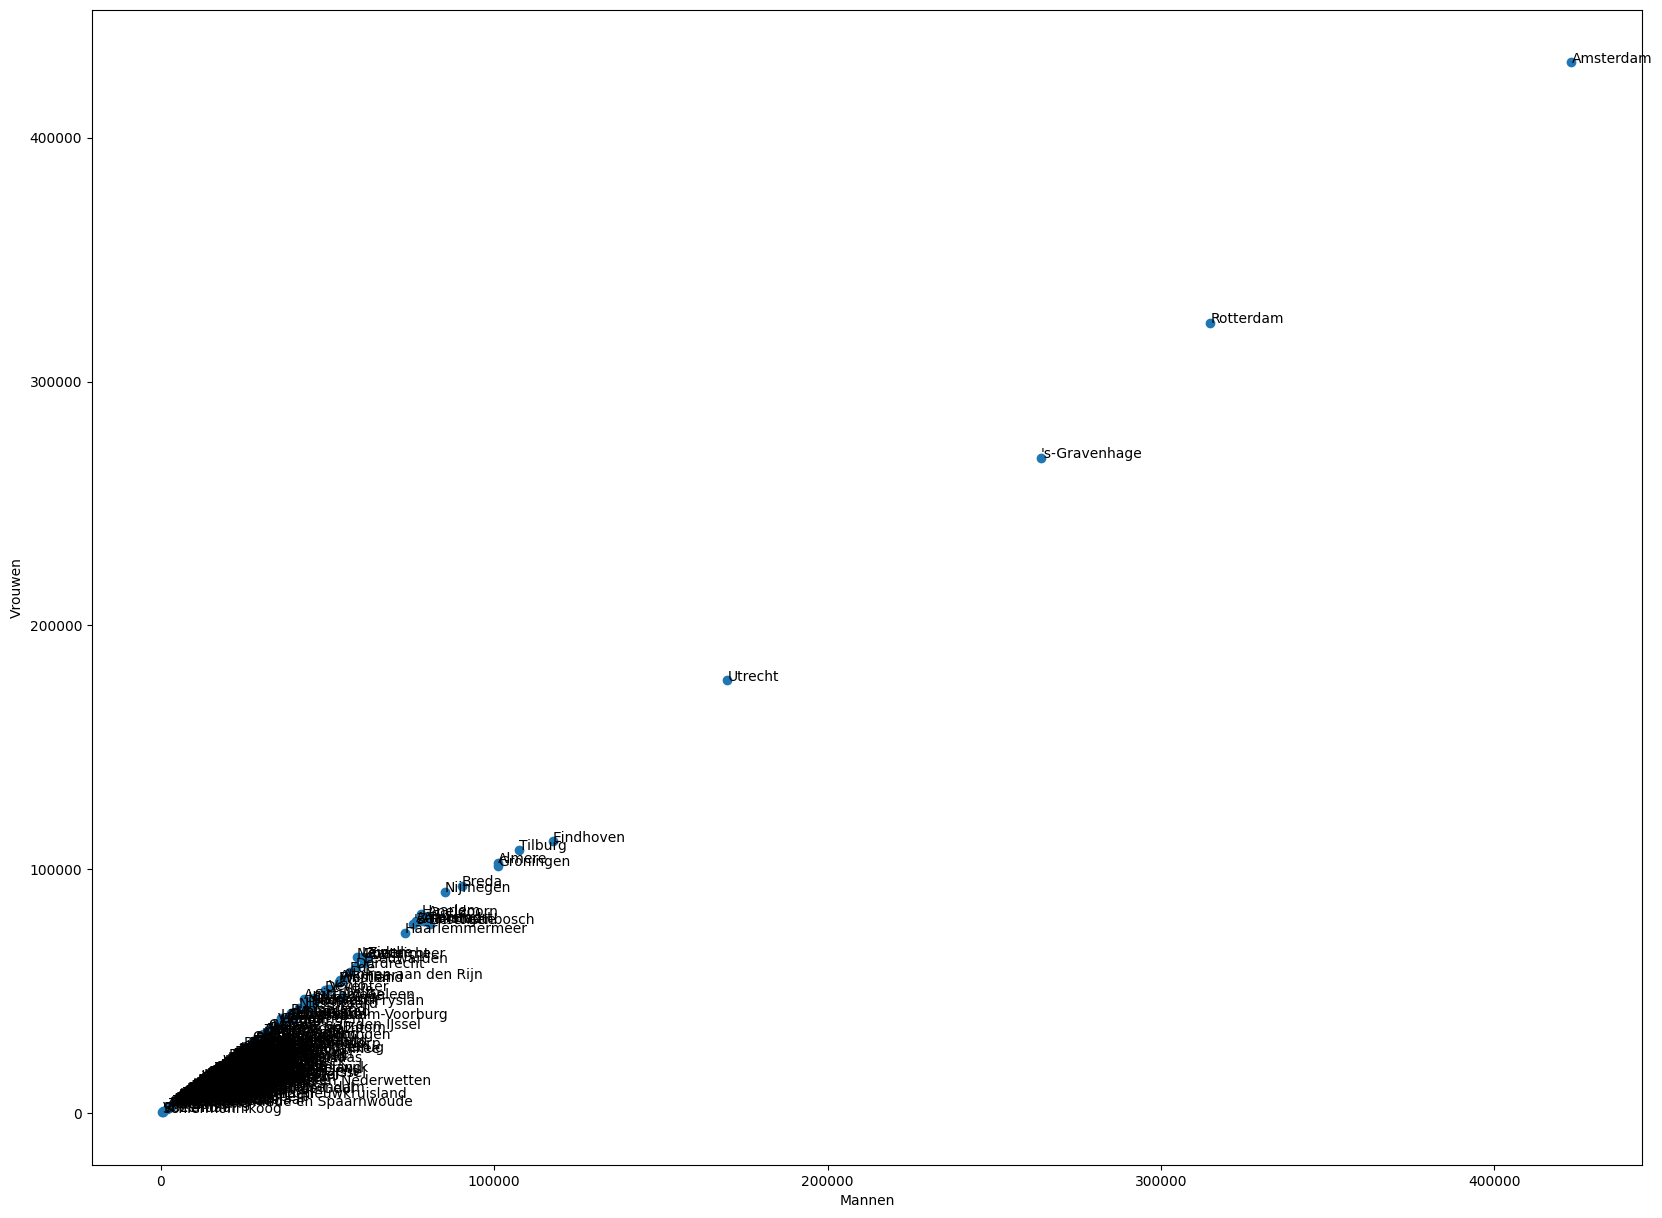

In [28]:
feature_one = 'a_man'
feature_two = 'a_vrouw'

plt.scatter(data_for_selected_region_type[feature_one], data_for_selected_region_type[feature_two])
plt.xlabel(column_reference_table[feature_one])
plt.ylabel(column_reference_table[feature_two])

# comment out for not showing labels
for i, txt in enumerate(data_for_selected_region_type['gm_naam']):
    x_co = data_for_selected_region_type.iloc[i][feature_one]
    y_co = data_for_selected_region_type.iloc[i][feature_two]
    plt.annotate(txt, (x_co, y_co))

Not very informative, let us create a new column!

In [29]:
data_for_selected_region_type['p_man'] = data_for_selected_region_type['a_man'] / (data_for_selected_region_type['a_vrouw']+data_for_selected_region_type['a_man'])
column_reference_table['p_man'] = 'Percentage mannen'
data_for_selected_region_type[['p_man','a_man','a_vrouw']].head(5)

p_man   a_man  a_vrouw
1   0.487332    5751     6050
9   0.499761    5235     5240
19  0.495886    3616     3676
34  0.501729   12475    12389
64  0.499477  101299   101511

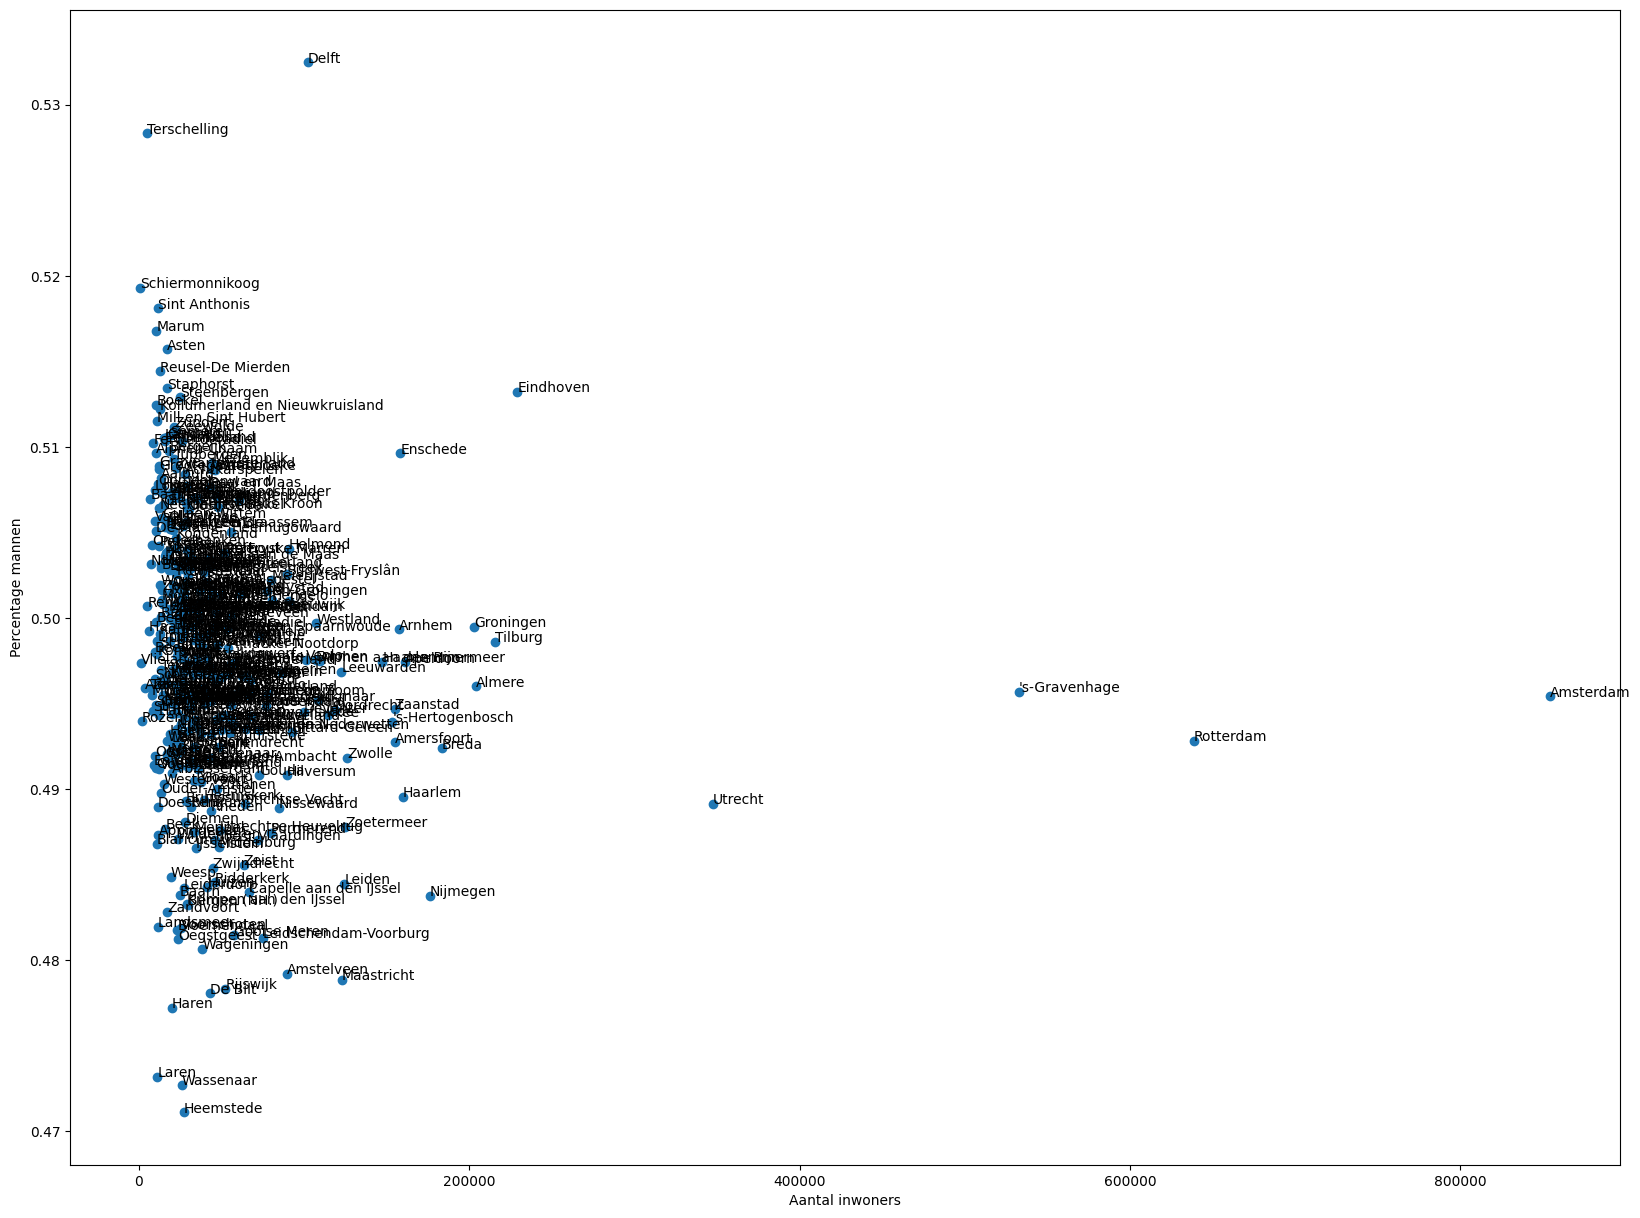

In [30]:
feature_one = 'a_inw'
feature_two = 'p_man'

plt.scatter(data_for_selected_region_type[feature_one], data_for_selected_region_type[feature_two])
plt.xlabel(column_reference_table[feature_one])
plt.ylabel(column_reference_table[feature_two])

# comment out for not showing labels
for i, txt in enumerate(data_for_selected_region_type['gm_naam']):
    x_co = data_for_selected_region_type.iloc[i][feature_one]
    y_co = data_for_selected_region_type.iloc[i][feature_two]
    plt.annotate(txt, (x_co, y_co))

Toy around with pandas to view and manipulate the data, this will be a very important part in becoming an AI practicioner.

### A simple machine learning algorithm

As always import the pacakge first. We will be using the powerfull package called sklearn. We will check if it works with a simple algorithm, called the perceptron (this will be covered in the course)

In [31]:
from sklearn.linear_model import Perceptron

In a nutshell, supervised machine learning uses some features (context, denoted as X) to predict some output (denoted as Y). The result is a model that can predict the outcome (Y) based on new unseen data (of X). As for example, can we find patterns between some features and the 'stedelijkheid' of a gemeente? You don't need to understand this, yet. Algorithms will be discussed later in the course.

### ste_mvs: Mate van stedelijkheid

This is what we want to predict (explanation in Dutch)

---

Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend. De volgende klassenindeling is gehanteerd:

1: zeer sterk stedelijk >= 2 500 adressen per km²

2: sterk stedelijk 1 500 - 2 500 adressen per km²

3: matig stedelijk 1 000 - 1 500 adressen per km²

4: weinig stedelijk 500 - 1 000 adressen per km²

5: niet stedelijk < 500 adressen per km²

In [32]:
label = 'ste_mvs'

y = data_for_selected_region_type[label]

print(y.unique())

['3' '4' '5' '1' '2']


For now, the only thing you need to know now is that a higher score is better.

In [33]:
# set our features, our context, the stuff that should discriminate between the labels in the output
# which crucial features is missing, and what does adding this to features do with the score?
features = ['bev_dich','a_inw','a_hh','a_woning','g_hhgro_float']

for f in features:
    print(f"Feature used: {column_reference_table[f]}")

X = data_for_selected_region_type[features]

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print(f"Score is: {clf.score(X, y)}")

Feature used: Bevolkingsdichtheid
Feature used: Aantal inwoners
Feature used: Huishoudens totaal
Feature used: Woningvoorraad
Feature used: Gemiddelde huishoudensgrootte
Score is: 0.34210526315789475


In [34]:
# which elements did we find with oppervlakte
[[k, v] for k, v in column_reference_table.items() if 'oppervlakte' in str.lower(v)]

[['g_pau_km', "Personenauto's naar oppervlakte"],
 ['a_opp_ha', 'Oppervlakte totaal'],
 ['a_lan_ha', 'Oppervlakte land'],
 ['a_wat_ha', 'Oppervlakte water']]

In [35]:
# which elements did we find with "adressen"
[[k, v] for k, v in column_reference_table.items() if 'huishouden' in str.lower(v)]

[['a_hh', 'Huishoudens totaal'],
 ['a_1p_hh', 'Eenpersoonshuishoudens'],
 ['a_hh_z_k', 'Huishoudens zonder kinderen'],
 ['a_hh_m_k', 'Huishoudens met kinderen'],
 ['g_hhgro', 'Gemiddelde huishoudensgrootte'],
 ['p_hh_li', '40% huishoudens met laagste inkomen'],
 ['p_hh_hi', '20% huishoudens met hoogste inkomen'],
 ['p_hh_lkk', 'Huishoudens met een laag inkomen'],
 ['g_pau_hh', "Personenauto's per huishouden"],
 ['g_hhgro_float', 'Gemiddelde huishoudensgrootte']]

In [36]:
data_for_selected_region_type['a_hh_p_km2'] = data_for_selected_region_type['a_hh'] / data_for_selected_region_type['a_opp_ha']
data_for_selected_region_type[['a_hh_p_km2','a_hh','a_opp_ha']].head(5)

a_hh_p_km2    a_hh  a_opp_ha
1     2.253865    5540      2458
9     0.976646    4391      4496
19    0.651651    2980      4573
34    0.510637   11617     22750
64   12.073005  122541     10150

In [37]:
column_reference_table['a_hh_p_km2'] = 'Adressen per oppervlakte'

In [38]:
# set our features, our context, the stuff that should discriminate between the labels in the output
# which crucial features is missing, and what does adding this to features do with the score?
features = ['a_hh_p_km2']

for f in features:
    print(f"Feature used: {column_reference_table[f]}")

X = data_for_selected_region_type[features]

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print(f"Score is: {clf.score(X, y)}")

Feature used: Adressen per oppervlakte
Score is: 0.48157894736842105


In [39]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
print(f"Your model scores: {accuracy_score(y, y_pred)}")

Your model scores: 0.48157894736842105


### Some Natural Language Pocessing (NLP) basics

Some simple checks with the powerfull NLP packes gensim and spacy.

First we test if Google's Word2Vec algorithm works, which can automatically learn semantically similar words based on input texts.

In [40]:
# load a pre-created Word2Vec corpus, dont worry, we wil explain what this is later during course
import gensim.downloader as api
from gensim.models import Word2Vec

big_corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [41]:
# train with default parameters, this may take a while
params = {
    'alpha': 0.01, # learning rate
    'window': 4, # the number of words to include as context
    'epochs': 2, # number of epochs
    'vector_size': 100, # number of hidden layers, ie., size of wordembedding
    'min_count':1, # use word that occur at least this much
    'sg':1, # use skipgram, 0 for cbow
}
big_model = Word2Vec(big_corpus, **params)

Dont worry, all of this will be explained later during course, for now have fun toying around with word2vec, which allows you to find similar words, semantically speaking.

In [42]:
big_model.wv.most_similar('car')

[('driver', 0.9364496469497681),
 ('pilot', 0.9266975522041321),
 ('hit', 0.9238709211349487),
 ('flying', 0.9214411973953247),
 ('jet', 0.9171131253242493),
 ('boat', 0.9170152544975281),
 ('gun', 0.9139451384544373),
 ('flight', 0.9108561873435974),
 ('crash', 0.9097909331321716),
 ('vehicle', 0.9091809988021851)]

Now test language models, which can syntactically analyze texts

In [43]:
import spacy
from spacy import displacy

In [44]:
# Open anaconda naviator, activate your (virtual) environment, and execute this download **once**!
# $ python -m spacy download en_core_web_sm

language_model = spacy.load("en_core_web_sm")

In [45]:
# set your input sentence
sentence = "This notebook was very interesting, I learned a lot"

doc = language_model(sentence)

options = {"compact": False, "bg": "#ffffff","distance":120,
           "color": "black", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", jupyter=True, options=options)